## ENEL 525 Final Project
### Eduardo Miguel Martínez García 

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
from matplotlib import image
import numpy as np
import os
import random
from PIL import Image
import PIL

## Importing images and choosing which ones will be used for training and testing
We begin by importing the images:

In [2]:
path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/cloudy19.jpg"
pathim = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2"

# Number of images
cloudy = 300 
rain = 215 
shine = 253
sunrise = 357
percentage = 0.8

randomizer = False

#We choose what images to use to train
if randomizer:
    cloudy_train = random.sample(range(1,cloudy+1), int(np.floor(percentage*cloudy)))
    rain_train = random.sample(range(1,rain+1), int(np.floor(percentage*rain)))
    shine_train = random.sample(range(1,shine+1), int(np.floor(percentage*shine)))
    sunrise_train = random.sample(range(1,sunrise+1), int(np.floor(percentage*sunrise)))
    print("Randomized selection of images with "+str(percentage)+" percentage of training!")
else:
    cloudy_train = np.arange(0,np.floor(cloudy*percentage))+1
    cloudy_train = cloudy_train.astype(int)
    rain_train = np.arange(0,np.floor(rain*percentage))+1
    rain_train = rain_train.astype(int)
    shine_train = np.arange(0,np.floor(shine*percentage))+1
    shine_train = shine_train.astype(int)
    sunrise_train = np.arange(0,np.floor(sunrise*percentage))+1
    sunrise_train = sunrise_train.astype(int)
    print("Non-randomized selection of images with "+str(percentage)+" percentage of training!")

#Choosing indices that are going to be tested:
cloudy_test = list(set(np.arange(0,cloudy)+1) - set(cloudy_train))
rainv_test = list(set(np.arange(0,rain)+1) - set(rain_train))
shinev_test = list(set(np.arange(0,shine)+1) - set(shine_train))
sunrisev_test = list(set(np.arange(0,sunrise)+1) - set(sunrise_train))


Non-randomized selection of images with 0.8 percentage of training!


With this, we can now put them together and read them in the same set. The size image varies greatly, so we begin by reading their sizes.

## Visualizing size distribution

In [3]:
##Vectors to save the different sizes
cloudsize = np.zeros([np.array(cloudy_train).size, 3])
rainsize = np.zeros([np.array(rain_train).size,3])
shinesize = np.zeros([np.array(shine_train).size,3])
sunrisesize = np.zeros([np.array(sunrise_train).size,3])

### Now we start saving the images!
train_cloud = []
for indx,u in enumerate(cloudy_train):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/cloudy"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        cloudsize[indx,0] = a1
        cloudsize[indx,1] = b1
        cloudsize[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        train_cloud.append(img)
    else:
        print("No se guardó la foto de clouds en training, foto número: ",str(u))


train_rain = []
for indx,u in enumerate(rain_train):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/rain"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a2,b2,c = img.shape
        rainsize[indx,0] = a2
        rainsize[indx,1] = b2
        rainsize[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        train_rain.append(img)
    else:
        print("No se guardó la foto de rains en training, foto número: ",str(u))


train_shine = []
for indx,u in enumerate(shine_train):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/shine"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a3,b3,c = img.shape

        shinesize[indx,0] = a3
        shinesize[indx,1] = b3
        shinesize[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        train_shine.append(img)
    else:
        print("No se guardó la foto de shine en training, foto número: ",str(u))


train_sunrise = []
for indx,u in enumerate(sunrise_train):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/sunrise"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a4,b4,c = img.shape
        sunrisesize[indx,0] = a4
        sunrisesize[indx,1] = b4
        sunrisesize[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        train_sunrise.append(img)
    else:
        print("No se guardó la foto de sunrise en training, foto número: ",str(u))


No se guardó la foto de clouds en training, foto número:  66
No se guardó la foto de clouds en training, foto número:  71


We need all the images to have the same size. So we can visualize the distribution of sizes per class.

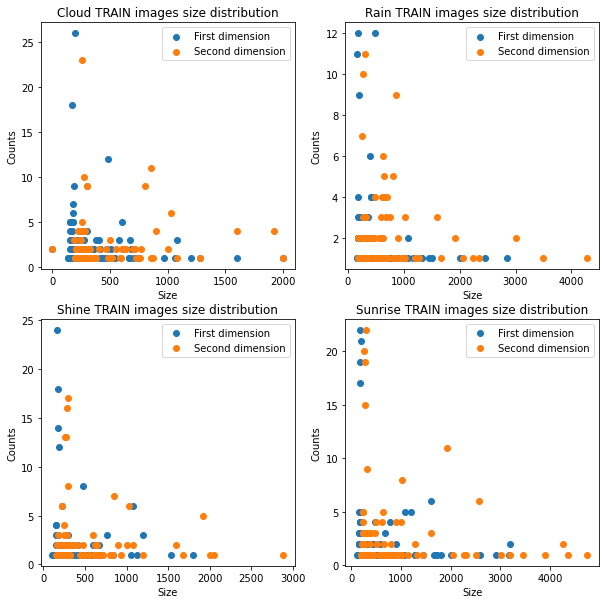

In [4]:
### We now plot the distribution of sizes
 
# We get the data:
unique1,counts1 = np.unique(cloudsize[:,0], return_counts=True)
unique2,counts2 = np.unique(cloudsize[:,1], return_counts=True)
unique3,counts3 = np.unique(rainsize[:,0], return_counts=True)
unique4,counts4 = np.unique(rainsize[:,1], return_counts=True)
unique5,counts5 = np.unique(shinesize[:,0], return_counts=True)
unique6,counts6 = np.unique(shinesize[:,1], return_counts=True)
unique7,counts7 = np.unique(sunrisesize[:,0], return_counts=True)
unique8,counts8 = np.unique(sunrisesize[:,1], return_counts=True)

fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(unique1,counts1, label = "First dimension")
axs[0,0].scatter(unique2,counts2, label = "Second dimension")
axs[0, 0].set_title('Cloud TRAIN images size distribution')
axs[0,0].legend()

axs[0,1].scatter(unique3,counts3, label = "First dimension")
axs[0,1].scatter(unique4,counts4, label = "Second dimension")
axs[0, 1].set_title('Rain TRAIN images size distribution')
axs[0,1].legend()


axs[1,0].scatter(unique5,counts5, label = "First dimension")
axs[1,0].scatter(unique6,counts6, label = "Second dimension")
axs[1, 0].set_title('Shine TRAIN images size distribution')
axs[1,0].legend()

axs[1,1].scatter(unique7,counts7, label = "First dimension")
axs[1,1].scatter(unique8,counts8, label = "Second dimension")
axs[1, 1].set_title('Sunrise TRAIN images size distribution')
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Size', ylabel='Counts')
#plt.scatter(unique1,counts1, label = "First dimension")
#plt.scatter(unique2,counts2, label = "Second dimension")
#plt.legend()
#plt.hist(counts1,unique1)

And now we choose the smallest the dimension.

In [5]:
firstd1 = min(np.min(cloudsize[np.nonzero(cloudsize[:,0]),0]), np.min(rainsize[np.nonzero(rainsize[:,0]),0]), np.min(shinesize[np.nonzero(shinesize[:,0]),0]), np.min(sunrisesize[np.nonzero(sunrisesize[:,0]),0]))
secondd1 = min(np.min(cloudsize[np.nonzero(cloudsize[:,1]),1]), np.min(rainsize[np.nonzero(rainsize[:,1]),1]), np.min(shinesize[np.nonzero(shinesize[:,1]),1]), np.min(sunrisesize[np.nonzero(sunrisesize[:,1]),1]))

print("The smallest dimensions for TRAINGIN images are ", str(firstd1) + " and ", str(secondd1))

The smallest dimensions for TRAINGIN images are  110.0 and  158.0


We can perform the same analysis but now with the testing images:

In [6]:
"""TESTING IMAGES!!!!!!! """
##Vectors to save the different sizes
cloudsize2 = np.zeros([np.array(cloudy_test).size, 3])
rainsize2 = np.zeros([np.array(rainv_test).size,3])
shinesize2 = np.zeros([np.array(shinev_test).size,3])
sunrisesize2 = np.zeros([np.array(sunrisev_test).size,3])

### Now we start saving the images!
test_cloud = []
for indx,u in enumerate(cloudy_test):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/cloudy"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        cloudsize2[indx,0] = a1
        cloudsize2[indx,1] = b1
        cloudsize2[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        test_cloud.append(img)
    else:
        print("No se guardó la foto de clouds en testing, foto número: ",str(u))


test_rain = []
for indx,u in enumerate(rainv_test):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/rain"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a2,b2,c = img.shape
        rainsize2[indx,0] = a2
        rainsize2[indx,1] = b2
        rainsize2[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        test_rain.append(img)
    else:
        print("No se guardó la foto de rains en testing, foto número: ",str(u))


test_shine = []
for indx,u in enumerate(shinev_test):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/shine"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a3,b3,c = img.shape

        shinesize2[indx,0] = a3
        shinesize2[indx,1] = b3
        shinesize2[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        test_shine.append(img)
    else:
        print("No se guardó la foto de shine en testing, foto número: ",str(u))


test_sunrise = []
for indx,u in enumerate(sunrisev_test):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/sunrise"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a4,b4,c = img.shape
        sunrisesize2[indx,0] = a4
        sunrisesize2[indx,1] = b4
        sunrisesize2[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        test_sunrise.append(img)
    else:
        print("No se guardó la foto de sunrise en testing, foto número: ",str(u))

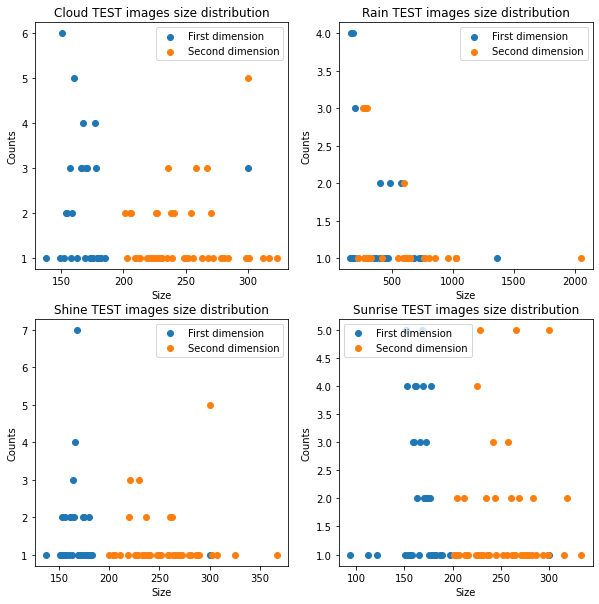

In [7]:
### We now plot the distribution of sizes
 
# We get the data:
unique1,counts1 = np.unique(cloudsize2[:,0], return_counts=True)
unique2,counts2 = np.unique(cloudsize2[:,1], return_counts=True)
unique3,counts3 = np.unique(rainsize2[:,0], return_counts=True)
unique4,counts4 = np.unique(rainsize2[:,1], return_counts=True)
unique5,counts5 = np.unique(shinesize2[:,0], return_counts=True)
unique6,counts6 = np.unique(shinesize2[:,1], return_counts=True)
unique7,counts7 = np.unique(sunrisesize2[:,0], return_counts=True)
unique8,counts8 = np.unique(sunrisesize2[:,1], return_counts=True)

fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(unique1,counts1, label = "First dimension")
axs[0,0].scatter(unique2,counts2, label = "Second dimension")
axs[0, 0].set_title('Cloud TEST images size distribution')
axs[0,0].legend()

axs[0,1].scatter(unique3,counts3, label = "First dimension")
axs[0,1].scatter(unique4,counts4, label = "Second dimension")
axs[0, 1].set_title('Rain TEST images size distribution')
axs[0,1].legend()


axs[1,0].scatter(unique5,counts5, label = "First dimension")
axs[1,0].scatter(unique6,counts6, label = "Second dimension")
axs[1, 0].set_title('Shine TEST images size distribution')
axs[1,0].legend()

axs[1,1].scatter(unique7,counts7, label = "First dimension")
axs[1,1].scatter(unique8,counts8, label = "Second dimension")
axs[1, 1].set_title('Sunrise TEST images size distribution')
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Size', ylabel='Counts')

In [8]:
firstd2 = min(np.min(cloudsize2[np.nonzero(cloudsize2[:,0]),0]), np.min(rainsize2[np.nonzero(rainsize2[:,0]),0]), np.min(shinesize2[np.nonzero(shinesize2[:,0]),0]), np.min(sunrisesize2[np.nonzero(sunrisesize2[:,0]),0]))
secondd2 = min(np.min(cloudsize2[np.nonzero(cloudsize2[:,1]),1]), np.min(rainsize2[np.nonzero(rainsize2[:,1]),1]), np.min(shinesize2[np.nonzero(shinesize2[:,1]),1]), np.min(sunrisesize2[np.nonzero(sunrisesize2[:,1]),1]))

print("The smallest dimensions for TESTING images are ", str(firstd2) + " and ", str(secondd2))

The smallest dimensions for TESTING images are  94.0 and  200.0


## Saving the data

And now we procceed to save the images

In [9]:
# We go through all of them

totals = np.array(np.nonzero(cloudsize[:,0])).size + np.array(np.nonzero(rainsize[:,0])).size + np.array(np.nonzero(shinesize[:,0])).size+ np.array(np.nonzero(sunrisesize[:,0])).size

train_data = np.zeros([totals, int(firstd1), int(secondd1), 3])

#We add clouds first
for u in range(0,np.array(train_cloud).size):
    train_data[u,:,:,:] = train_cloud[u][:int(firstd1),:int(secondd1),:]
v = u #We save our counter for the next for
    
# We now add rainsize
for u in range(v+1,v+np.array(train_rain).size+1):
    train_data[u,:,:,:] = train_rain[u-v-1][:int(firstd1),:int(secondd1),:]
w = u # We now save the next counter! 
    
# We now add shine images
for u in range(w+1,w+np.array(train_shine).size+1):
    train_data[u,:,:,:] = train_shine[u-w-1][:int(firstd1),:int(secondd1),:]
y = u # We now save the next counter!
    
#We now add sunrise
for u in range(y+1,y+np.array(train_sunrise).size+1):
    train_data[u,:,:,:] = train_sunrise[u-y-1][:int(firstd1),:int(secondd1),:]

<ipython-input-9-381c8ab7fdf4>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(0,np.array(train_cloud).size):
<ipython-input-9-381c8ab7fdf4>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(v+1,v+np.array(train_rain).size+1):
<ipython-input-9-381c8ab7fdf4>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


And now we have the data organized.

In [10]:
#train_data[-1,:,:,:]

We will now assign the tags as:
1 = cloudy
2 = rain
3 = shine
4 = sunrise

In [11]:
cl = np.ones(np.array(train_cloud).size)
ra = 2*np.ones(np.array(train_rain).size)
sh = 3*np.ones(np.array(train_shine).size)
su = 4*np.ones(np.array(train_sunrise).size)
train_labels = np.concatenate((cl,ra,sh,su),axis=0)

<ipython-input-11-689f036997fb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cl = np.ones(np.array(train_cloud).size)
<ipython-input-11-689f036997fb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra = 2*np.ones(np.array(train_rain).size)
<ipython-input-11-689f036997fb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sh = 3*np.o

And now we choose the images. 
We will be using images of the same size as the training images. If an image does not have the appropiate size we will discard it for testing.

In [12]:
# We go through all of them

totals2 = np.array(np.nonzero(cloudsize2[:,0])).size + np.array(np.nonzero(rainsize2[:,0])).size + np.array(np.nonzero(shinesize2[:,0])).size+ np.array(np.nonzero(sunrisesize2[:,0])).size

test_data = np.zeros([totals2, int(firstd1), int(secondd1), 3])

#cloudy_test = list(set(np.arange(0,cloudy)+1) - set(cloudy_train))
#rainv_test = list(set(np.arange(0,rain)+1) - set(rain_train))
#shinev_test = list(set(np.arange(0,shine)+1) - set(shine_train))
#sunrisev_test = list(set(np.arange(0,sunrise)+1) - set(sunrise_train))


#We add clouds first
for u in range(0,np.array(test_cloud).size):
    a,b,c = test_cloud[u][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        test_data[u,:,:,:] = test_cloud[u][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de clouds ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
v = u #We save our counter for the next for
    
# We now add rainsize
for u in range(v+1,v+np.array(test_rain).size+1):
    a,b,c = test_rain[u-v-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        test_data[u,:,:,:] = test_rain[u-v-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de rain ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
w = u # We now save the next counter! 
    
# We now add shine images
for u in range(w+1,w+np.array(test_shine).size+1):
    a,b,c = test_shine[u-w-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        test_data[u,:,:,:] = test_shine[u-w-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de shine ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
y = u # We now save the next counter!
    
#We now add sunrise
for u in range(y+1,y+np.array(test_sunrise).size+1):
    a,b,c = test_sunrise[u-y-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        test_data[u,:,:,:] = test_sunrise[u-y-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de sunrise ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
    
    
    #train_data[u,:,:,:] = train_sunrise[u-y-1][:int(firstd1),:int(secondd1),:]

No se guardó la imagen de sunrise  225 es de tamaño: 94, 300


<ipython-input-12-e7a98cd5ed1b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(0,np.array(test_cloud).size):
<ipython-input-12-e7a98cd5ed1b>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(v+1,v+np.array(test_rain).size+1):
<ipython-input-12-e7a98cd5ed1b>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

And we now once again create our testing labels:

In [13]:
cl2 = np.ones(np.array(test_cloud).size)
ra2 = 2*np.ones(np.array(test_rain).size)
sh2 = 3*np.ones(np.array(test_shine).size)
su2 = 4*np.ones(np.array(test_sunrise).size)
test_labels = np.concatenate((cl2,ra2,sh2,su2),axis=0)

<ipython-input-13-6b0ea23835a8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cl2 = np.ones(np.array(test_cloud).size)
<ipython-input-13-6b0ea23835a8>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra2 = 2*np.ones(np.array(test_rain).size)
<ipython-input-13-6b0ea23835a8>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sh2 = 3*np.

Let's just fix the labels as the model has problems working with them beginning in another range

In [14]:
test_labels = test_labels-1
train_labels = train_labels-1

We normalize our data:

In [15]:
train_data = train_data/255
test_data = test_data/255

So we finally have the data we want to be working with: 

train_data
train_labels

test_data
test_labels

In [16]:
train_data.shape

(897, 110, 158, 3)

In [17]:
train_labels.shape

(897,)

In [18]:
test_data.shape

(226, 110, 158, 3)

In [19]:
test_labels.shape

(226,)

Text(0.5, 1.0, 'How images look after treatment')

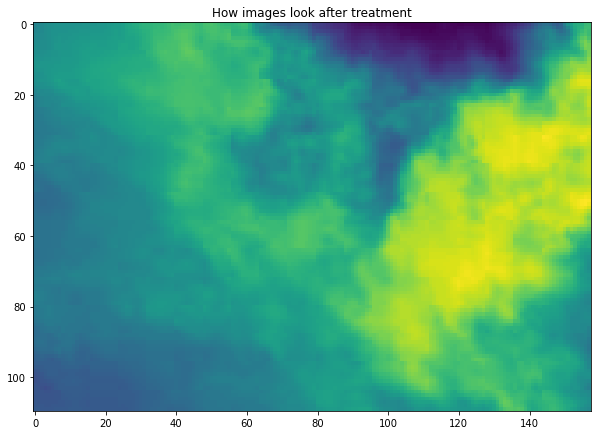

In [20]:
plt.imshow(train_data[0,:,:,0])
plt.title("How images look after treatment")

Text(0.5, 1.0, 'How images looked at the beginning')

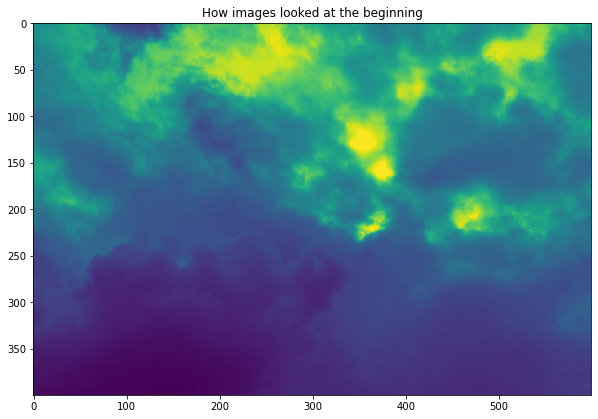

In [21]:
path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/cloudy1.jpg"
img = image.imread(path)
plt.imshow(img[:,:,1], interpolation = 'nearest')
plt.title("How images looked at the beginning")

## TRAINING THE MODEL
Now we have ready our data for training. We need now to do the same with out testing data. We start by double checking we have the right image size:

In [22]:
print("The dimensions of our model are: ", str(train_data[0,:,:,:].shape))
print("The smallest dimensions of the images in training are: " + str(firstd1) + " and: " + str(secondd1))
firstd1 = int(firstd1)
secondd1 = int(secondd1)

The dimensions of our model are:  (110, 158, 3)
The smallest dimensions of the images in training are: 110.0 and: 158.0


So we have the right dimensions. we now train our model.

In [23]:
model = models.Sequential() #We first create the model
model.add(layers.Conv2D(secondd1, (3, 3), activation='relu', input_shape=(firstd1, secondd1, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 156, 158)     4424      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 78, 158)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 76, 64)        91072     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 36, 64)        36928     
                                                                 
Total params: 132,424
Trainable params: 132,424
Non-trai

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 156, 158)     4424      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 78, 158)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 76, 64)        91072     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 36, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 55296)             0

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))

Epoch 1/10
29/29 [==============================] - 24s 803ms/step - loss: 1.1235 - accuracy: 0.4727 - val_loss: 0.8979 - val_accuracy: 0.6947
Epoch 2/10
29/29 [==============================] - 24s 815ms/step - loss: 0.8094 - accuracy: 0.6734 - val_loss: 1.2333 - val_accuracy: 0.5664
Epoch 3/10
29/29 [==============================] - 24s 818ms/step - loss: 0.9801 - accuracy: 0.5753 - val_loss: 0.6660 - val_accuracy: 0.7478
Epoch 4/10
29/29 [==============================] - 24s 814ms/step - loss: 0.7699 - accuracy: 0.6533 - val_loss: 0.7990 - val_accuracy: 0.7699
Epoch 5/10
29/29 [==============================] - 24s 844ms/step - loss: 0.7675 - accuracy: 0.6589 - val_loss: 0.6685 - val_accuracy: 0.7522
Epoch 6/10
29/29 [==============================] - 24s 821ms/step - loss: 0.7003 - accuracy: 0.7202 - val_loss: 0.5656 - val_accuracy: 0.8053
Epoch 7/10
29/29 [==============================] - 25s 848ms/step - loss: 0.6327 - accuracy: 0.7380 - val_loss: 0.7029 - val_accuracy: 0.7876

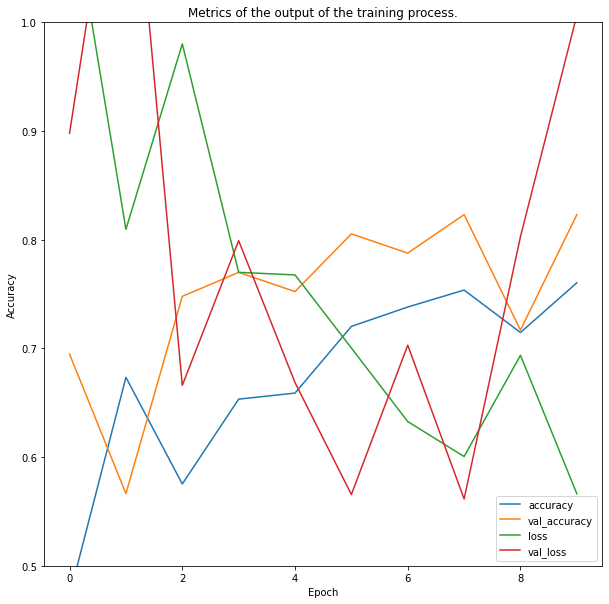

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")

plt.title("Metrics of the output of the training process.")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [29]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=1)
print("The final accuracy for this model is: ",str(test_acc))

8/8 [==============================] - 1s 147ms/step - loss: 1.0064 - accuracy: 0.8230
The final accuracy for this model is:  0.8230088353157043


We can specify for a special case:

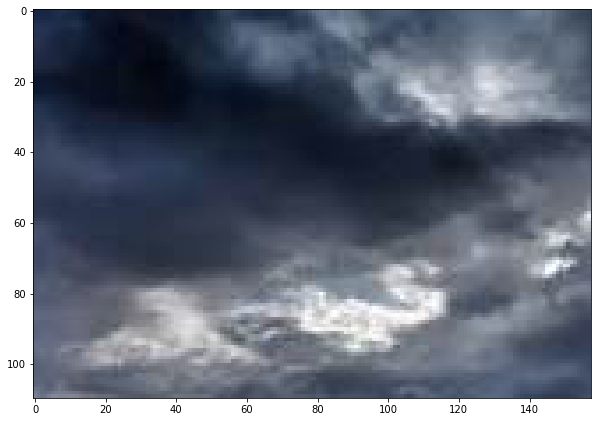

In [30]:
plt.imshow(test_data[0,:,:,:])

In [31]:
model.predict(np.array(test_data[:,:,:,:]))[0,:]

array([ 1.6731789 ,  0.9842749 , -0.3225937 ,  0.05066328], dtype=float32)

and we can see it accurately predicted the image of a cloud

## Testing with my own pictures

In [32]:
cloud2 = 8
rain2 = 5
shine2 = 2
sunrise2 = 2

cloudsize3 = np.zeros([cloud2, 3])
rainsize3 = np.zeros([rain2,3])
shinesize3 = np.zeros([shine2,3])
sunrisesize3 = np.zeros([sunrise2,3])

### Now we start saving the images!
# First clouds!!

mine_cloud = []
for indx,u in enumerate(range(1,cloud2+1)):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/TEST/cloud"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        cloudsize3[indx,0] = a1
        cloudsize3[indx,1] = b1
        cloudsize3[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        mine_cloud.append(img)
    else:
        print("No se guardó la foto de clouds de mis fotos, foto número: ",str(u))
        
#Then rains!!
mine_rains = []
for indx,u in enumerate(range(1,rain2+1)):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/TEST/rain"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        rainsize3[indx,0] = a1
        rainsize3[indx,1] = b1
        rainsize3[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        mine_rains.append(img)
    else:
        print("No se guardó la foto de clouds de mis fotos, foto número: ",str(u))
        
#Then shine
mine_shine = []
for indx,u in enumerate(range(1,shine2+1)):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/TEST/shine"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        shinesize3[indx,0] = a1
        shinesize3[indx,1] = b1
        shinesize3[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        mine_shine.append(img)
    else:
        print("No se guardó la foto de clouds de mis fotos, foto número: ",str(u))
        
#Then sunrise
mine_sunrise = []
for indx,u in enumerate(range(1,sunrise2+1)):
    path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/TEST/sunrise"+str(u)+".jpg"
    img = image.imread(path)
    
    if img.ndim == 3:
        a1,b1,c = img.shape
        sunrisesize3[indx,0] = a1
        sunrisesize3[indx,1] = b1
        sunrisesize3[indx,2] = c
    
        if c == 4:
            img = np.delete(img, 3, axis = 2)
    
        #We save the new image
        mine_sunrise.append(img)
    else:
        print("No se guardó la foto de clouds de mis fotos, foto número: ",str(u))

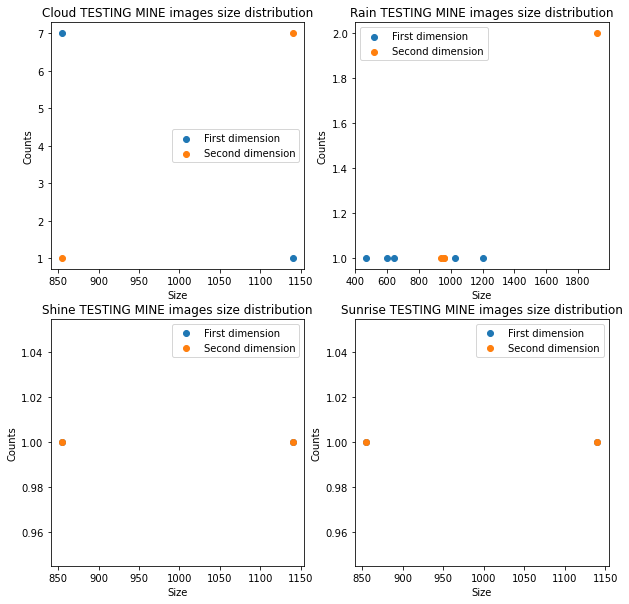

In [33]:
### We now plot the distribution of sizes
 
# We get the data:
unique1,counts1 = np.unique(cloudsize3[:,0], return_counts=True)
unique2,counts2 = np.unique(cloudsize3[:,1], return_counts=True)
unique3,counts3 = np.unique(rainsize3[:,0], return_counts=True)
unique4,counts4 = np.unique(rainsize3[:,1], return_counts=True)
unique5,counts5 = np.unique(shinesize3[:,0], return_counts=True)
unique6,counts6 = np.unique(shinesize3[:,1], return_counts=True)
unique7,counts7 = np.unique(sunrisesize3[:,0], return_counts=True)
unique8,counts8 = np.unique(sunrisesize3[:,1], return_counts=True)

fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(unique1,counts1, label = "First dimension")
axs[0,0].scatter(unique2,counts2, label = "Second dimension")
axs[0, 0].set_title('Cloud TESTING MINE images size distribution')
axs[0,0].legend()

axs[0,1].scatter(unique3,counts3, label = "First dimension")
axs[0,1].scatter(unique4,counts4, label = "Second dimension")
axs[0, 1].set_title('Rain TESTING MINE images size distribution')
axs[0,1].legend()


axs[1,0].scatter(unique5,counts5, label = "First dimension")
axs[1,0].scatter(unique6,counts6, label = "Second dimension")
axs[1, 0].set_title('Shine TESTING MINE images size distribution')
axs[1,0].legend()

axs[1,1].scatter(unique7,counts7, label = "First dimension")
axs[1,1].scatter(unique8,counts8, label = "Second dimension")
axs[1, 1].set_title('Sunrise TESTING MINE images size distribution')
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Size', ylabel='Counts')

In [34]:
# We go through all of them

totals3 = np.array(np.nonzero(cloudsize3[:,0])).size + np.array(np.nonzero(rainsize3[:,0])).size + np.array(np.nonzero(shinesize3[:,0])).size+ np.array(np.nonzero(sunrisesize3[:,0])).size

mine_data = np.zeros([totals3, int(firstd1), int(secondd1), 3])

#We add clouds first
for u in range(0,np.array(mine_cloud).size):
    a,b,c = mine_cloud[u][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        mine_data[u,:,:,:] = mine_cloud[u][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de clouds ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
v = u #We save our counter for the next for
    
# We now add rainsize
for u in range(v+1,v+np.array(mine_rains).size+1):
    a,b,c = mine_rains[u-v-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        mine_data[u,:,:,:] = mine_rains[u-v-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de rain ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
w = u # We now save the next counter! 
    
# We now add shine images
for u in range(w+1,w+np.array(mine_shine).size+1):
    a,b,c = mine_shine[u-w-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        mine_data[u,:,:,:] = mine_shine[u-w-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de shine ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
y = u # We now save the next counter!
    
#We now add sunrise
for u in range(y+1,y+np.array(mine_sunrise).size+1):
    a,b,c = mine_sunrise[u-y-1][:,:,:].shape
    if a >= firstd1 and b >= secondd1:
        mine_data[u,:,:,:] = mine_sunrise[u-y-1][:int(firstd1),:int(secondd1),:]
    else:
        print("No se guardó la imagen de sunrise ", str(u)+ " es de tamaño: " + str(a) + ", " + str(b))
    
    
    #train_data[u,:,:,:] = train_sunrise[u-y-1][:int(firstd1),:int(secondd1),:]

<ipython-input-34-e8c7238ea96d>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(0,np.array(mine_cloud).size):
<ipython-input-34-e8c7238ea96d>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(v+1,v+np.array(mine_rains).size+1):
<ipython-input-34-e8c7238ea96d>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

And we once again compare data:

Text(0.5, 1.0, 'How MY IMAGES look after treatment')

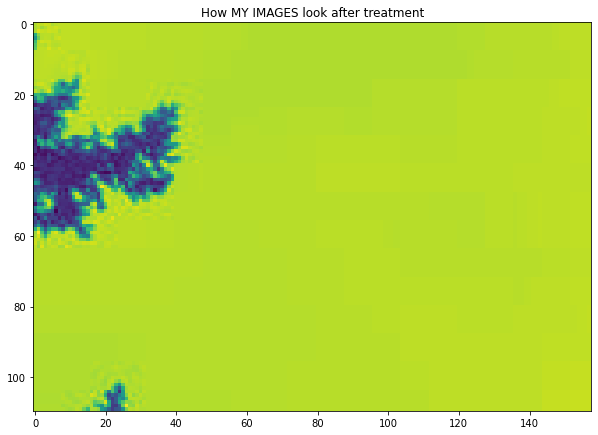

In [35]:
plt.imshow(mine_data[0,:,:,0])
plt.title("How MY IMAGES look after treatment")

Text(0.5, 1.0, 'How images looked at the beginning')

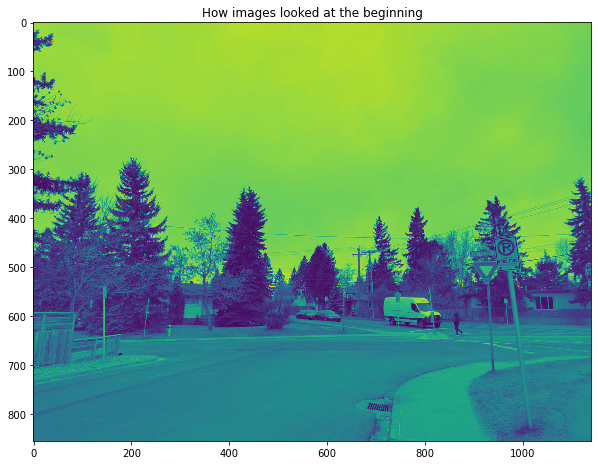

In [36]:
path = "C:/Users/eduar/Desktop/Escuela/Tec/Noveno/ENEL_525/PROYECTO/dataset2/TEST/cloud1.jpg"
img = image.imread(path)
plt.imshow(img[:,:,1], interpolation = 'nearest')
plt.title("How images looked at the beginning")

So we can see that we had to make a big cut of the pictures! Now let's try them

In [37]:
cl3 = np.ones(np.array(mine_cloud).size)
ra3 = 2*np.ones(np.array(mine_rains).size)
sh3 = 3*np.ones(np.array(mine_shine).size)
su3 = 4*np.ones(np.array(mine_sunrise).size)
mine_labels = np.concatenate((cl3,ra3,sh3,su3),axis=0)
mine_labels = mine_labels-1
mine_labels = mine_labels.astype(int)

<ipython-input-37-989e5a44fd7b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cl3 = np.ones(np.array(mine_cloud).size)
<ipython-input-37-989e5a44fd7b>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra3 = 2*np.ones(np.array(mine_rains).size)
<ipython-input-37-989e5a44fd7b>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sh3 = 3*np

Normalize:

In [38]:
mine_data = mine_data / 255

In [39]:
test_loss, test_acc = model.evaluate(mine_data,  mine_labels, verbose=1)
print("The final accuracy for this model is: ",str(test_acc))

1/1 [==============================] - 0s 169ms/step - loss: 1.7533 - accuracy: 0.3529
The final accuracy for this model is:  0.3529411852359772


Which is a decent accuracy.

We can evaluate it with my data:

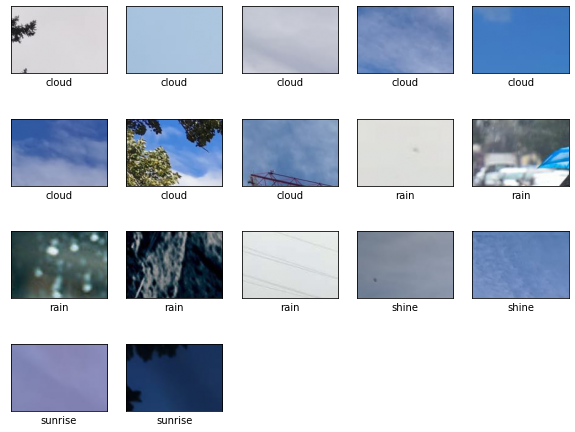

In [40]:
class_names = ['cloud', 'rain', "shine", "sunrise"]
plt.figure(figsize=(10,10))
for i in range(17):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mine_data[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[mine_labels[i]])
plt.show()

In [41]:
aa = model.predict(np.array(mine_data[:,:,:,:]))
bb = np.argmax(aa,axis = 1)

And the results of the model:

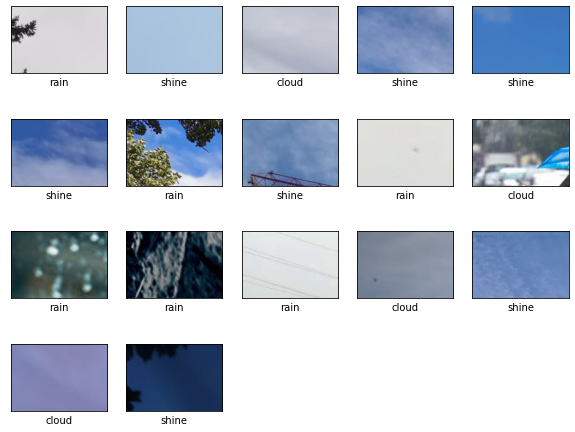

In [42]:
class_names = ['cloud', 'rain', "shine", "sunrise"]
plt.figure(figsize=(10,10))
for i in range(17):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mine_data[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[bb[i]])
plt.show()

In [43]:
aa = model.predict(np.array(test_data[:,:,:,:]))
bb = np.argmax(aa,axis = 1)

In [44]:
#First cloud
conf_matrix = np.zeros([4,4])
for u in range(np.array(test_cloud).size):
    conf_matrix[0,int(bb[u])] = conf_matrix[0,int(bb[u])]+1
v = u
conf_matrix[0,:] = conf_matrix[0,:]/(np.array(test_cloud).size)


# Now rain
for u in range(np.array(test_cloud).size, v + np.array(test_rain).size+1):
    conf_matrix[1,int(bb[u])] = conf_matrix[1,int(bb[u])]+1
y = u
conf_matrix[1,:] = conf_matrix[1,:]/(np.array(test_rain).size)


# Now shine
for u in range(v + np.array(test_rain).size+1, y + np.array(test_shine).size+1):
    conf_matrix[2,int(bb[u])] = conf_matrix[2,int(bb[u])]+1
z = u
conf_matrix[2,:] = conf_matrix[2,:]/(np.array(test_shine).size)


#Now sunrise
for u in range(y + np.array(test_shine).size+1, z + np.array(test_sunrise).size+1):
    conf_matrix[3,int(bb[u])] = conf_matrix[3,int(bb[u])]+1
z = u
conf_matrix[3,:] = conf_matrix[3,:]/(np.array(test_sunrise).size)

<ipython-input-44-23850407d49a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for u in range(np.array(test_cloud).size):
<ipython-input-44-23850407d49a>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  conf_matrix[0,:] = conf_matrix[0,:]/(np.array(test_cloud).size)
<ipython-input-44-23850407d49a>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating 

In [45]:
conf_matrix

array([[0.63333333, 0.21666667, 0.03333333, 0.11666667],
       [0.06976744, 0.74418605, 0.        , 0.18604651],
       [0.01960784, 0.03921569, 0.88235294, 0.05882353],
       [0.        , 0.01388889, 0.        , 0.98611111]])